In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
# import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import random
import yaml


In [2]:
def read_yaml(yaml_file):
    '''Read yaml file for getting config parameters
    input - yaml file name along with path'''
    data_dict = None
    with open(yaml_file) as f:
        data_dict = yaml.safe_load(f)
    test_percent = int(data_dict['test_percent'])
    author_data_choice = data_dict['author_data_choice']
    data_augmentation = data_dict['data_augmentation']
    return test_percent, author_data_choice, data_augmentation

In [3]:
# read yaml file
yaml_file_name = 'data_config.yaml'
test_percent, author_data_choice, data_augmentation = read_yaml(yaml_file_name)

In [4]:
# display read config parameters
print(" ====== data config ======= ")
print("test percent : ", test_percent , type(test_percent))
print("author_data_choice : ", author_data_choice, type(author_data_choice))
print("data_augmentation : ", data_augmentation, type(data_augmentation))

 ====== data config ======= 
test percent :  30 <class 'int'>
author_data_choice :  True <class 'bool'>
data_augmentation :  True <class 'bool'>


In [5]:
# read main data file
df = pd.read_csv('./final_master_dataset.csv')

In [6]:
# df

In [7]:
df = df[['Category', 'Question', 'Source']]

In [8]:
# df

In [9]:
# clean dataset, don't take questions which don't mention categories
df_new = df[~df.Category.isna()]
# df_new

In [10]:
# create new category by splitting it and taking initial words before "-"
df_new['Category_new'] = df['Category'].str.split('-')
# df_new

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df_new['Category_new'] = df_new.Category_new.apply(lambda x: x[0])
# df_new

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
# drop duplicates
df_new = df_new.drop_duplicates(['Question'])
# df_new

In [13]:
# check the count of each categories
df_count = pd.DataFrame(df_new.groupby(['Category_new'])['Question'].count())
df_count = df_count.reset_index()
df_count

Category_new  Question
0            Comparison         60
1      Economic Effects         55
2          Having COVID         48
3   Individual Response         57
4          Nomenclature         47
5                Origin         74
6                 Other         31
7            Prevention        121
8             Reporting         78
9      Societal Effects        114
10    Societal Response         95
11          Speculation         53
12             Symptoms         37
13              Testing         61
14         Transmission        229
15            Treatment         71

In [14]:
# sort dataframe according to count of questions in categories
df_count = df_count.sort_values(['Question'], ascending=True)
# df_count

Text(0.5, 1.0, 'Number of unique questions per category')

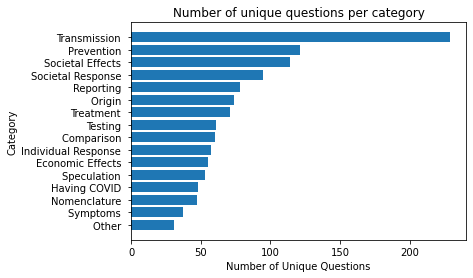

In [15]:
# plot the count of categories
plt.barh(df_count['Category_new'], df_count['Question'])
plt.xlabel('Number of Unique Questions')
plt.ylabel('Category')
plt.title('Number of unique questions per category')

In [16]:
# take only 10 best categories according to number of questions
df_count = df_count.sort_values(['Question'], ascending=False)
df_count = df_count.head(9)
df_count

Category_new  Question
14       Transmission        229
7          Prevention        121
9    Societal Effects        114
10  Societal Response         95
8           Reporting         78
5              Origin         74
15          Treatment         71
13            Testing         61
0          Comparison         60

In [17]:
# df_new

In [18]:
categories = df_new['Category_new'].unique()
categories

array(['Speculation ', 'Transmission ', 'Nomenclature ', 'Reporting ',
       'Societal Response ', 'Societal Effects ', 'Origin ',
       'Prevention ', 'Treatment ', 'Other ', 'Testing ', 'Comparison ',
       'Economic Effects ', 'Symptoms ', 'Having COVID ',
       'Individual Response '], dtype=object)

In [19]:
# find out the questions belong to each source
df_count = pd.DataFrame(df_new.groupby(['Source'])['Question'].count())
df_count = df_count.reset_index()
# df_count

In [20]:
# sort values according number of questions
df_count = df_count.sort_values(['Question'], ascending=True)
df_count

Source  Question
8                 John Hopkins University        10
10                         United Nations        12
11  Washington DC Area Television Station        12
12                          Yahoo Answers        13
7    Illinois Department of Public Health        16
4            Food and Drug Administration        33
1                             Bing Search        44
2                      Cable News Network        46
3              Center for Disease Control        49
5          GitHub.com/deepset-ai/COVID-QA        54
13                           Yahoo Search        79
6                           Google Search       116
0                        Author Generated       248
9                                   Quora       499

Text(0.5, 1.0, 'Number of unique questions per source')

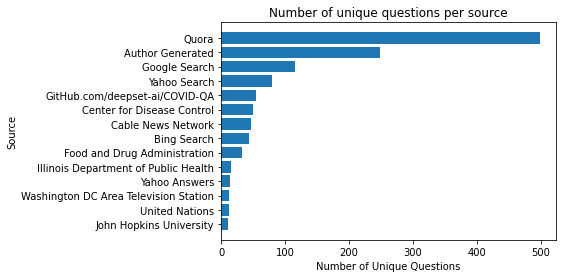

In [21]:
# plot number of questions for each source
plt.barh(df_count['Source'], df_count['Question'])
plt.xlabel('Number of Unique Questions')
plt.ylabel('Source')
plt.title('Number of unique questions per source')

In [22]:
# list of sources
sources = df_count['Source'].unique()
sources = list(sources)
sources

['John Hopkins University',
 'United Nations',
 'Washington DC Area Television Station',
 'Yahoo Answers',
 'Illinois Department of Public Health',
 'Food and Drug Administration',
 'Bing Search',
 'Cable News Network',
 'Center for Disease Control',
 'GitHub.com/deepset-ai/COVID-QA',
 'Yahoo Search',
 'Google Search',
 'Author Generated',
 'Quora']

In [23]:
# number of questions per cateogry and sources
df_count = pd.DataFrame(df_new.groupby(['Category_new', 'Source'])['Question'].count()).reset_index()
# df_count

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Source wise number of questions for each category')

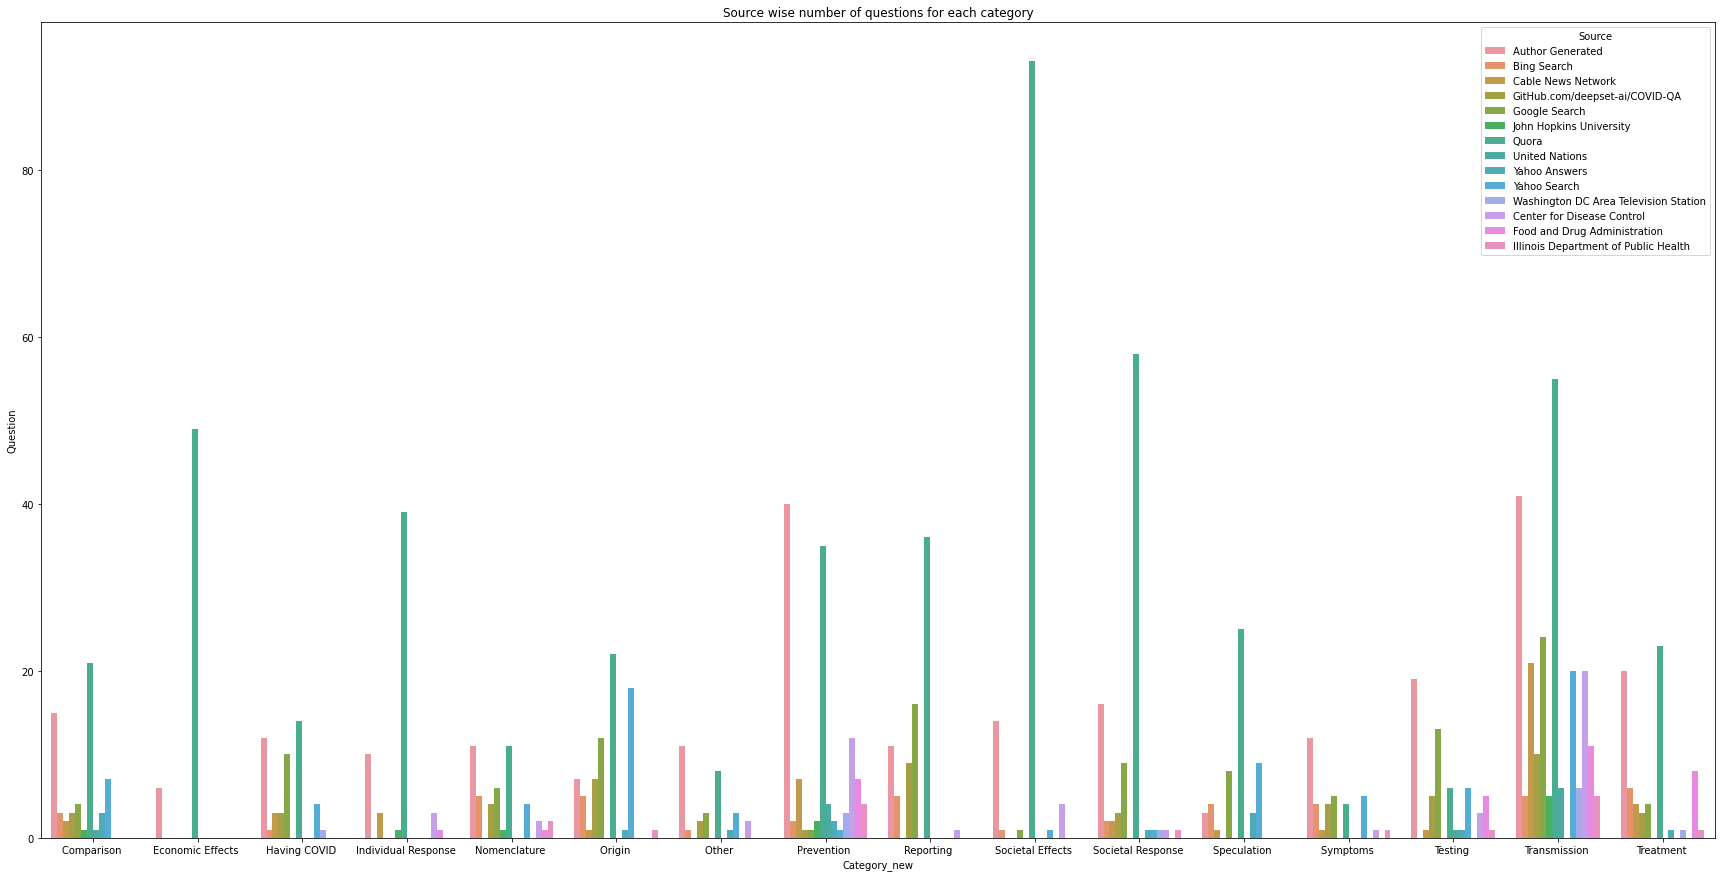

In [24]:
# plot number of questions per category and sources
plt.figure(figsize=(30,15))
sns.barplot(df_count['Category_new'], df_count['Question'], hue=df_count['Source'])
plt.title("Source wise number of questions for each category")

<Figure size 432x288 with 0 Axes>

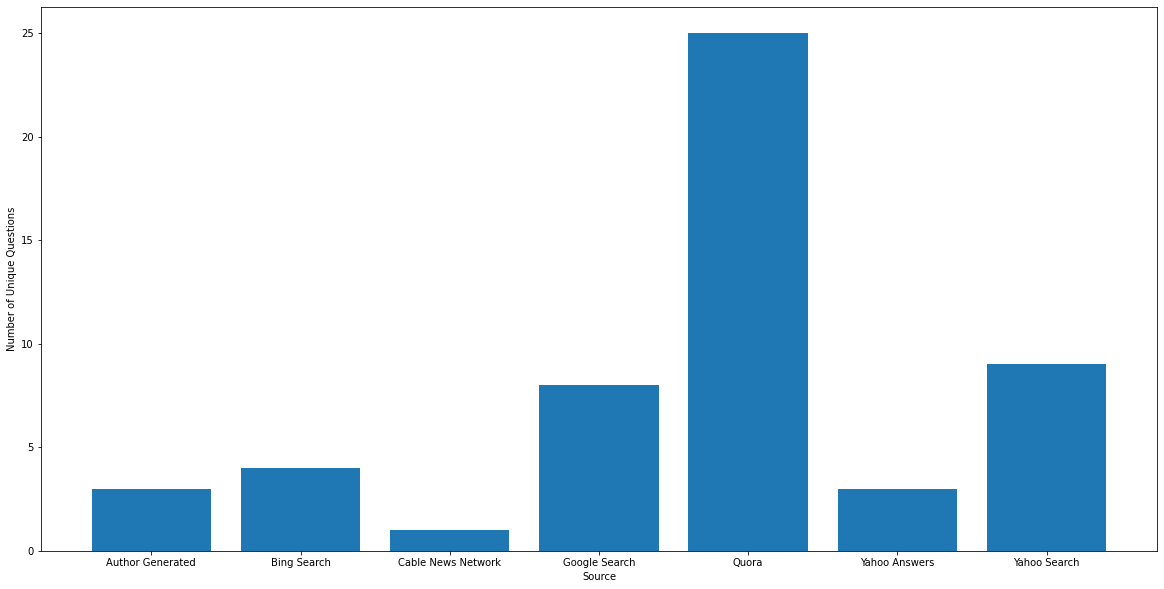

<Figure size 432x288 with 0 Axes>

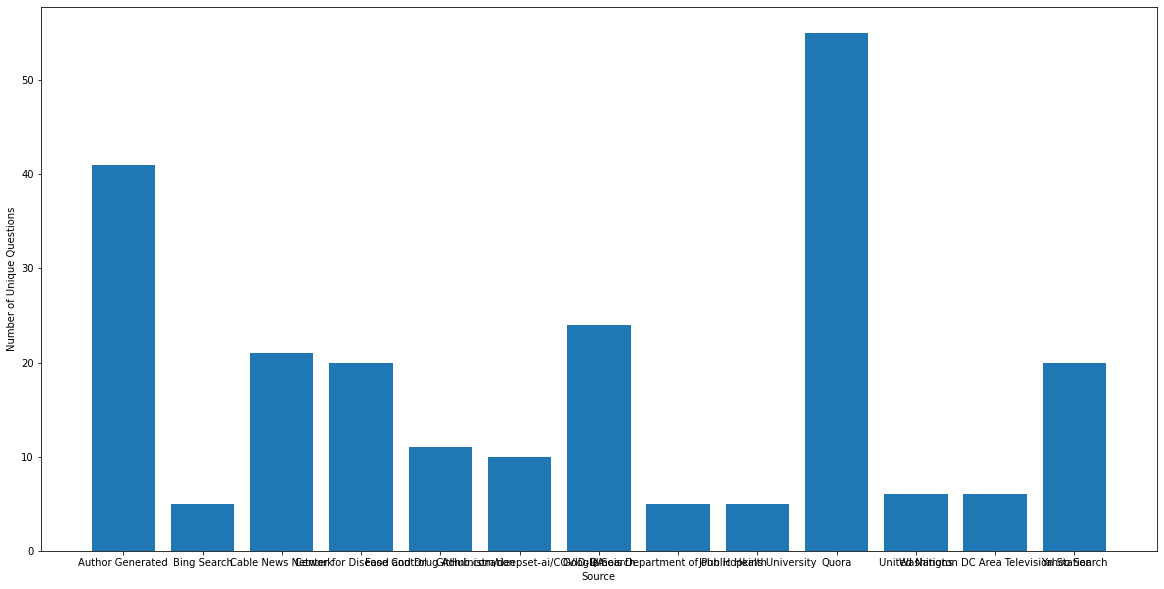

<Figure size 432x288 with 0 Axes>

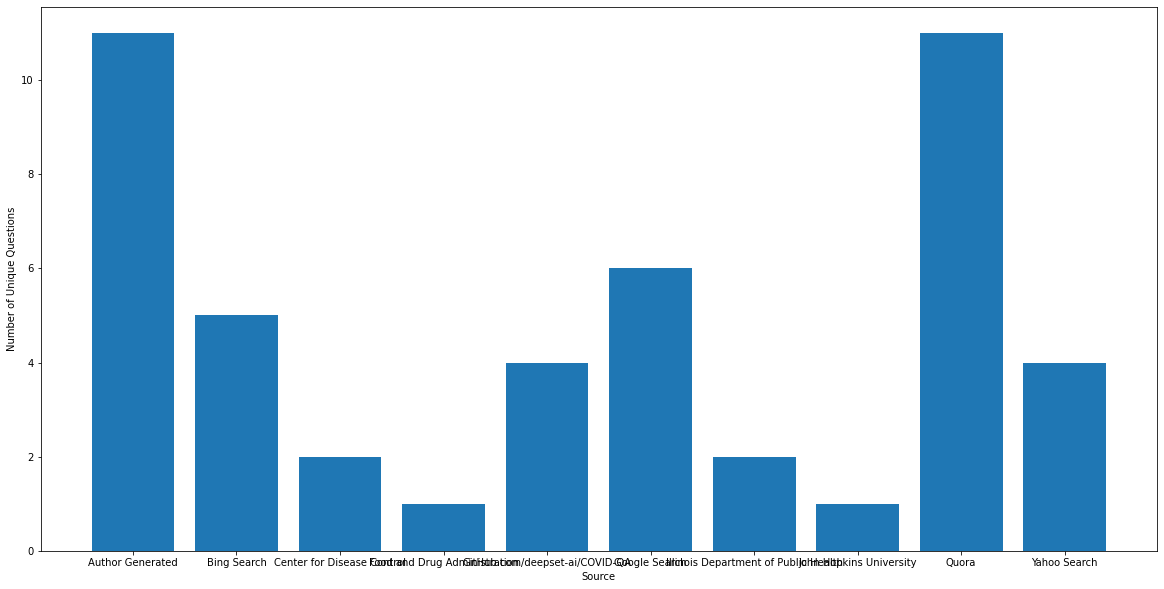

<Figure size 432x288 with 0 Axes>

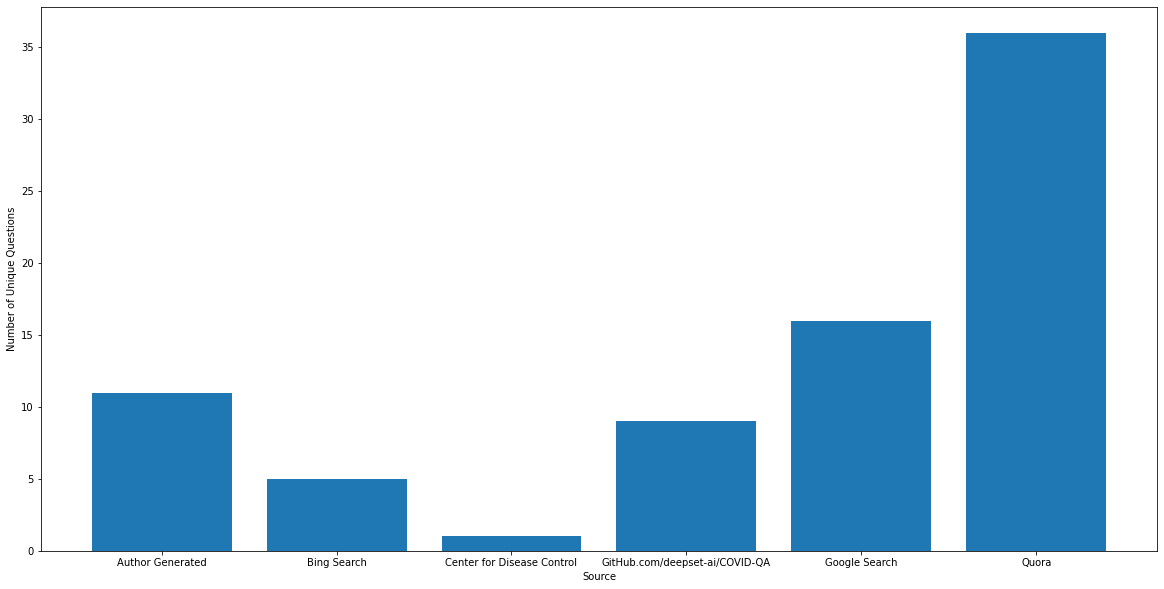

<Figure size 432x288 with 0 Axes>

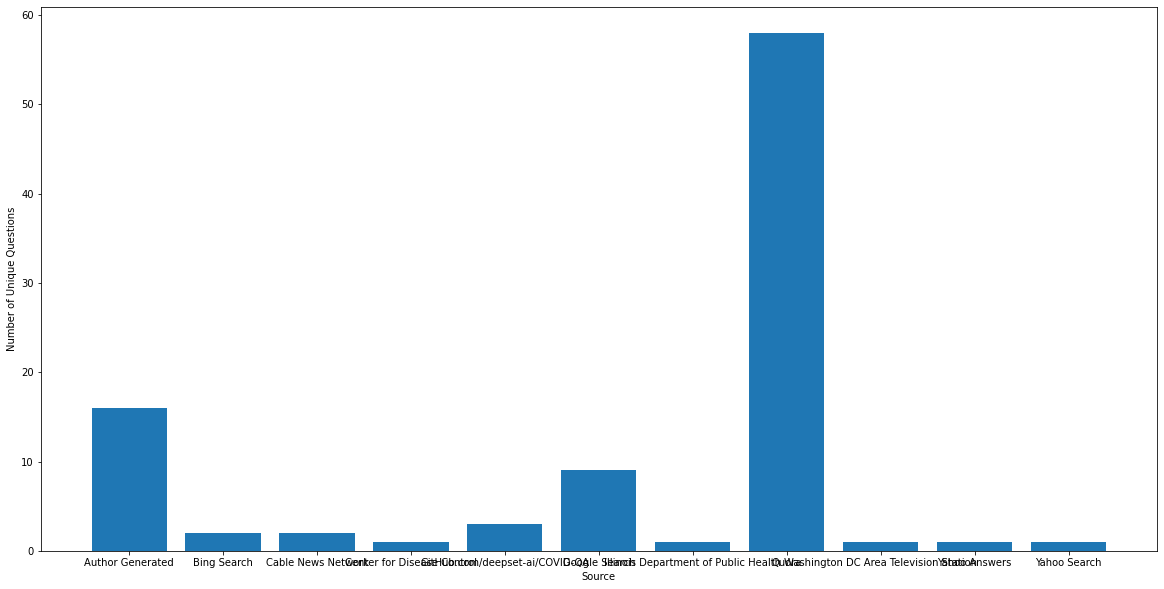

<Figure size 432x288 with 0 Axes>

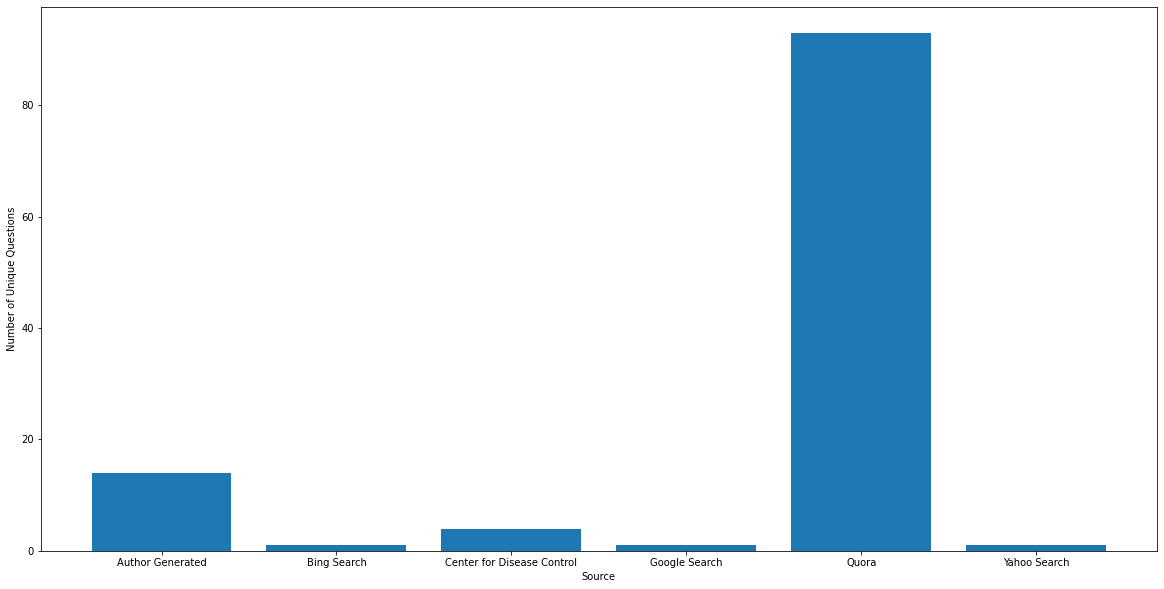

<Figure size 432x288 with 0 Axes>

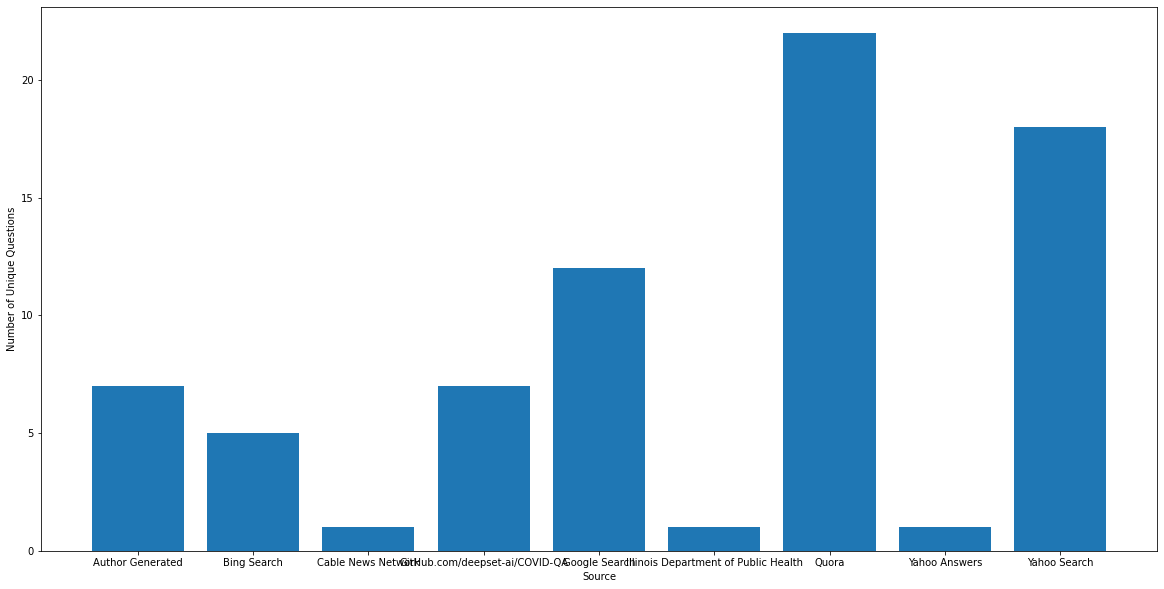

<Figure size 432x288 with 0 Axes>

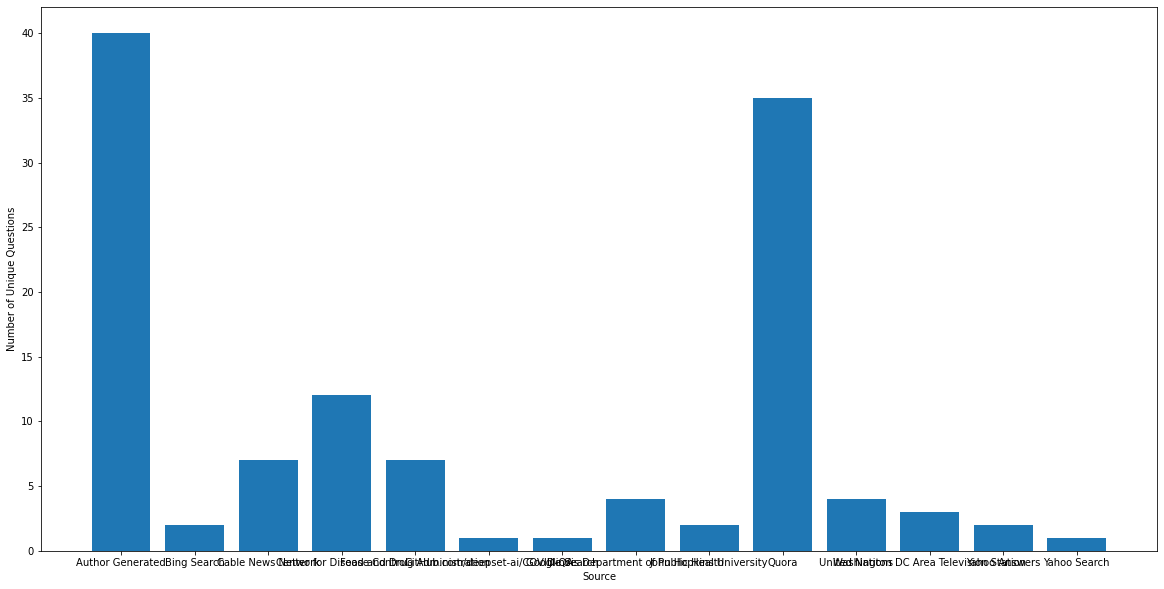

<Figure size 432x288 with 0 Axes>

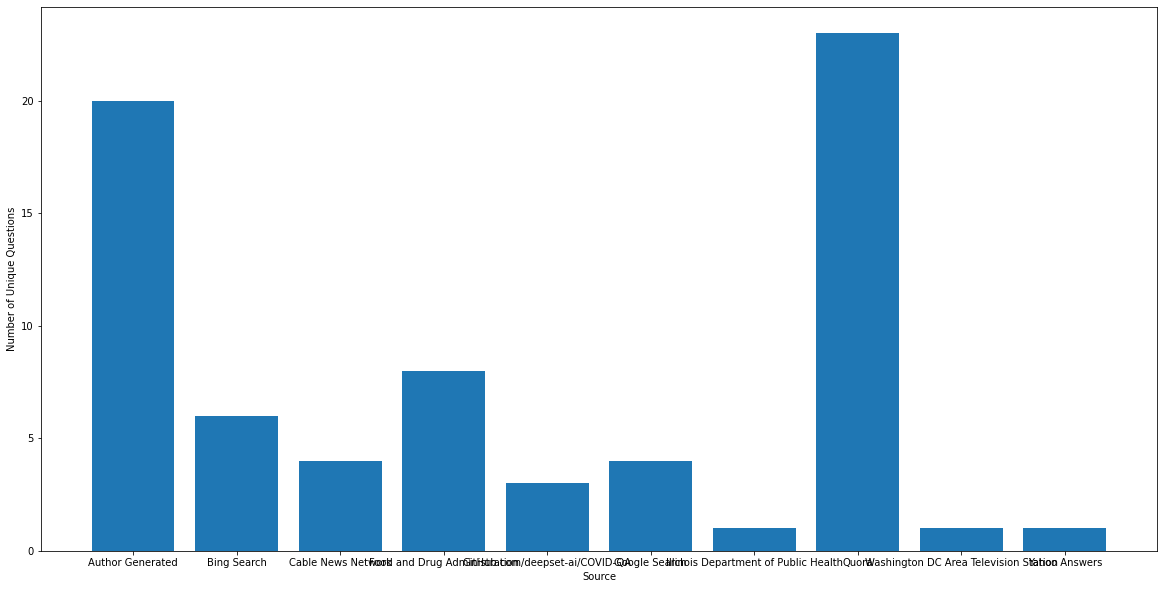

<Figure size 432x288 with 0 Axes>

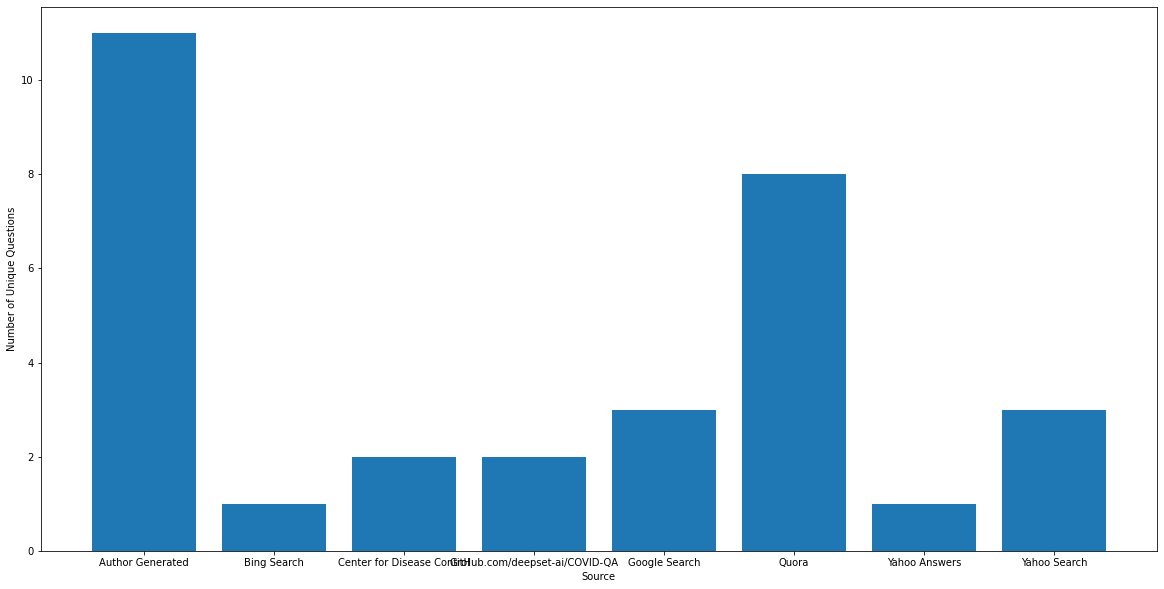

<Figure size 432x288 with 0 Axes>

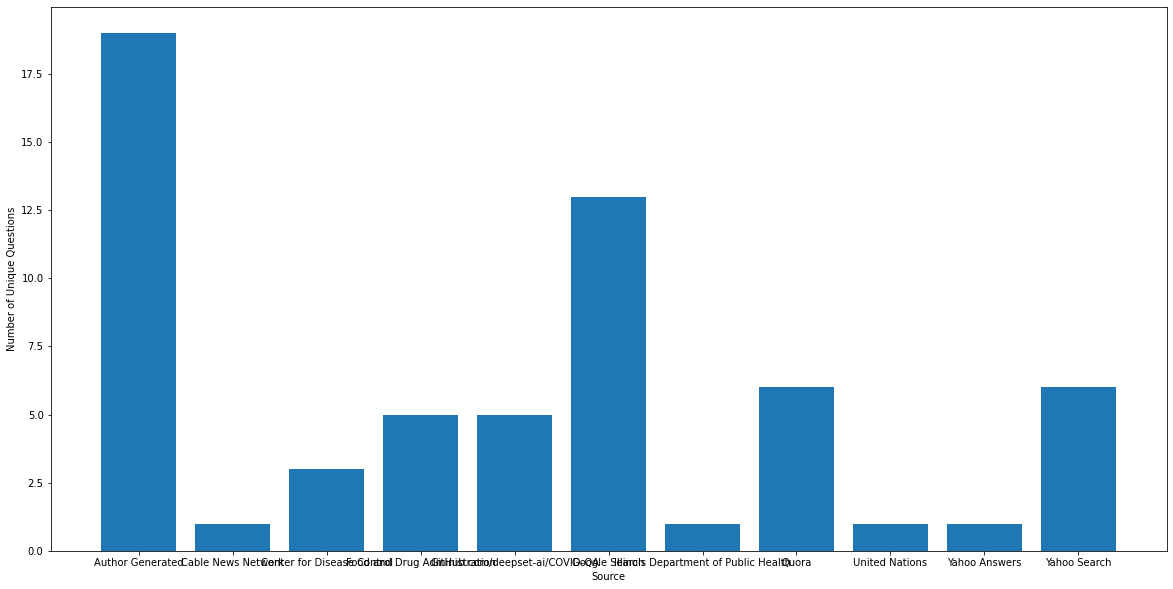

<Figure size 432x288 with 0 Axes>

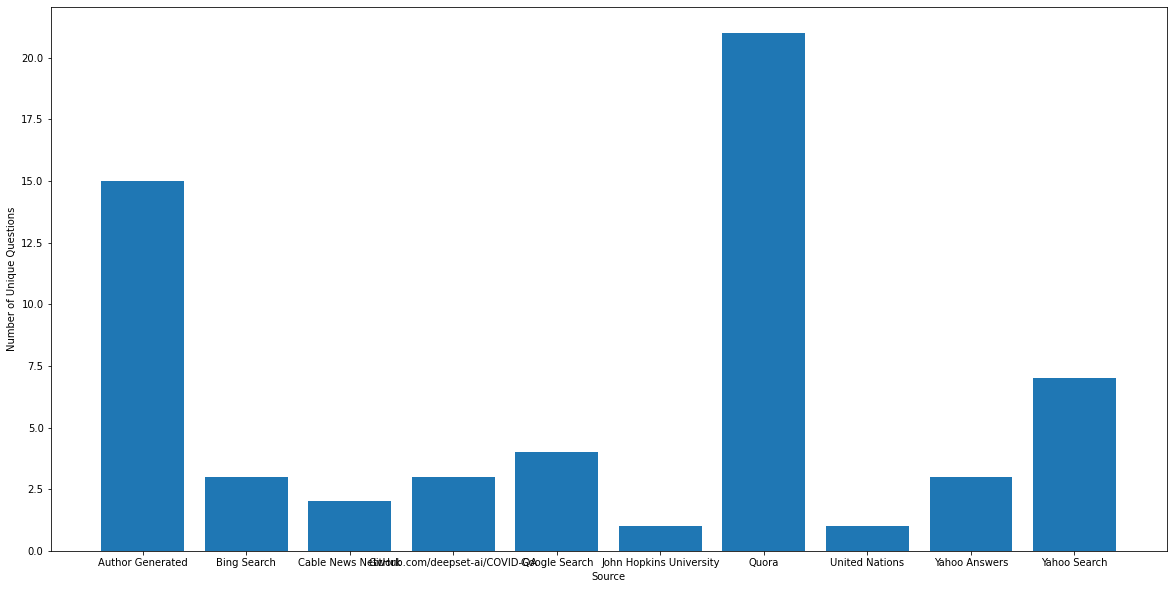

<Figure size 432x288 with 0 Axes>

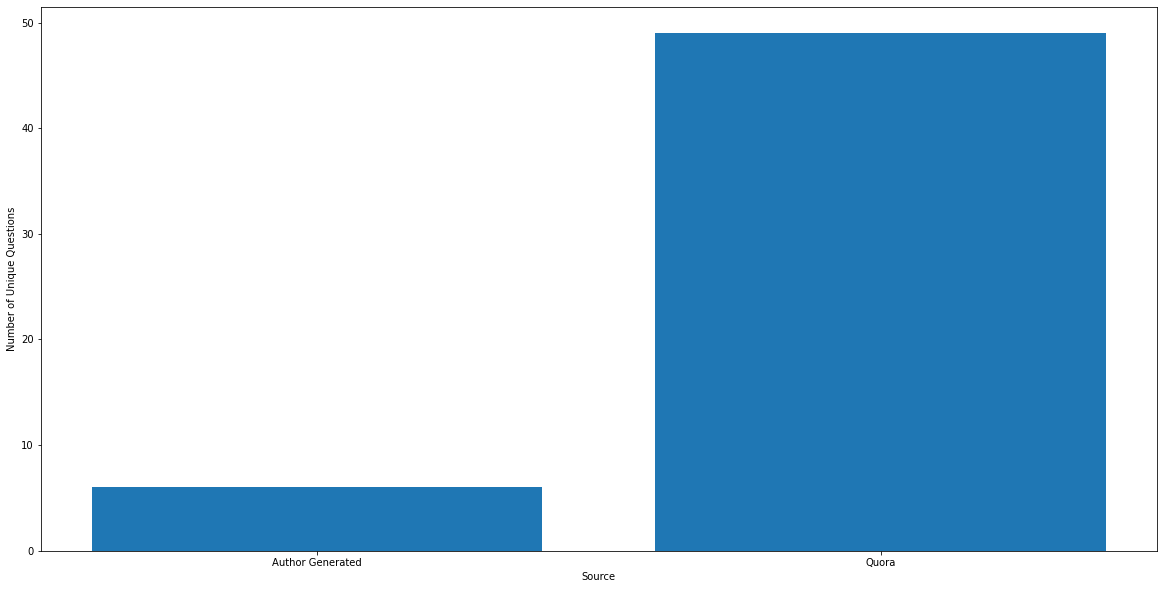

<Figure size 432x288 with 0 Axes>

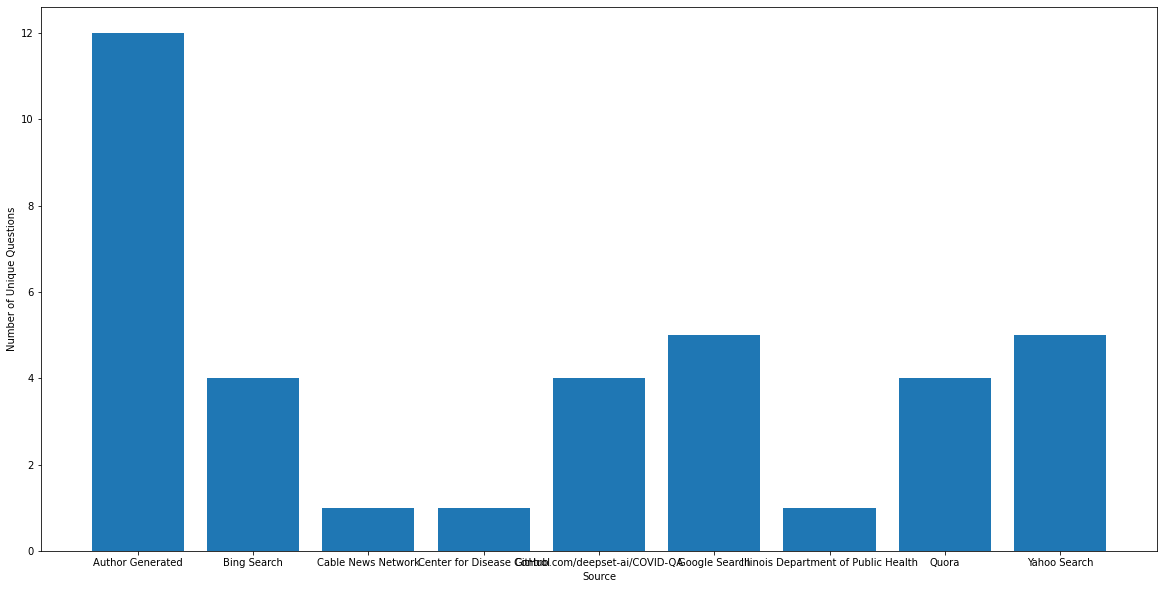

<Figure size 432x288 with 0 Axes>

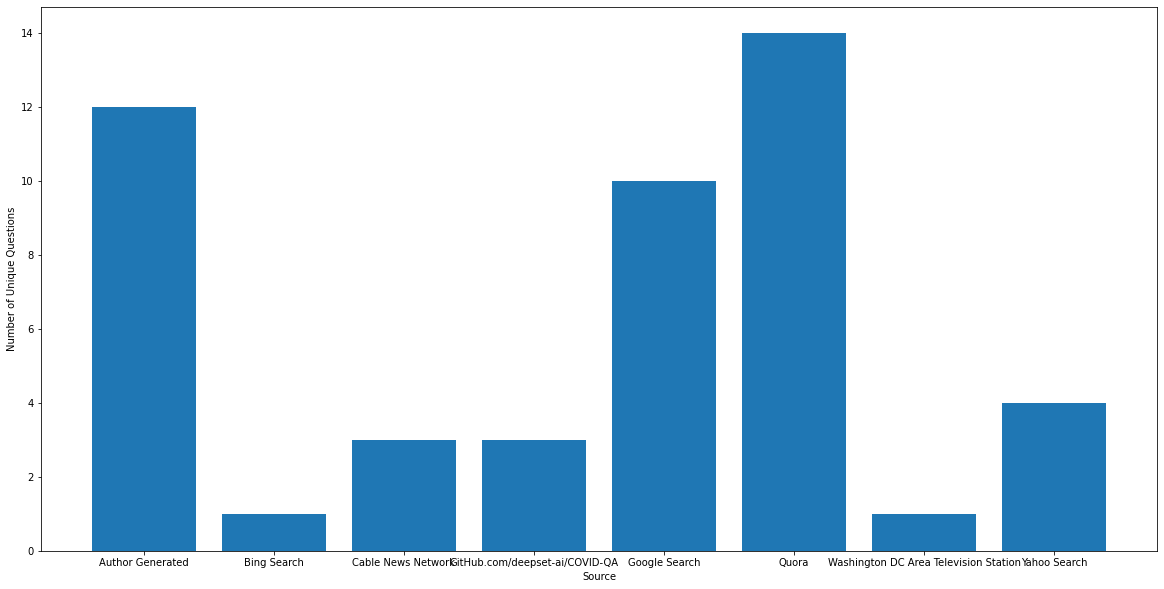

<Figure size 432x288 with 0 Axes>

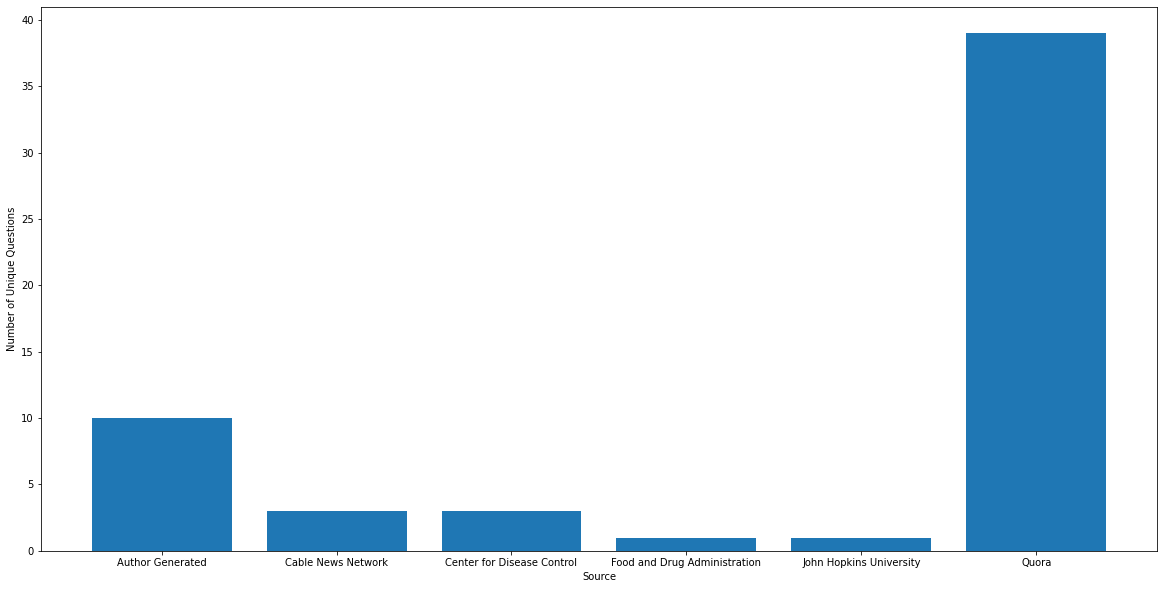

In [25]:
# plot number of questions per source for each category seperately
# ax = fig.subplots(nrows=3, ncols=3)
for idx, i in enumerate(categories):
    df_count1 = df_count[df_count['Category_new']==i] # filter on given category 
    fig = plt.figure()
    plt.figure(figsize=(20,10))
#     print(idx+1)
#     plt.subplot(3,3,idx+1)
    plt.bar(df_count1['Source'], df_count1['Question'])
    plt.xlabel('Source')
    plt.ylabel('Number of Unique Questions')
#     plt.title('Number of Questions per Source for Category '+ i)
    plt.show()

### text preprocessing

In [26]:
# do the test processing to see which are the main words appearing in each category

In [27]:
#applying tokenization function to the column
nltk.download('punkt')
df_new['Question_tokenized'] = df_new['Question'].astype(str)
df_new['Question_tokenized']= df_new['Question_tokenized'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
# stopwords 
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
# stopword removal 
def remove_stopwords(text):
    output= [i for i in text if i.lower() not in stopwords]
    return output

In [30]:
# recursively remove stopwords
df_new['Question_stopword_removed']= df_new['Question_tokenized'].apply(lambda x:remove_stopwords(x))
df_new

Category  \
0     Speculation - Pandemic Duration   
1     Speculation - Pandemic Duration   
2     Speculation - Pandemic Duration   
3     Speculation - Pandemic Duration   
4     Speculation - Pandemic Duration   
...                               ...   
1240        Reporting - Media Coverup   
1241              Treatment - Quinine   
1242              Treatment - Quinine   
1243           Other - Food Shortages   
1244           Other - Food Shortages   

                                               Question            Source  \
0                                   will covid end soon     Google Search   
1                                        will covid end      Yahoo Search   
2                               when covid will be over     Google Search   
3                              when covid lockdown ends     Google Search   
4                                    will covid go away     Google Search   
...                                                 ...               ...   
1240  is the media hiding what is really going on in...             Quora   
1241     can quinine be taken to fight this covid virus             Quora   
1242           why is quinine effective in curing covid             Quora   
1243                  could we run out of things to eat  Author Generated   
1244                      do i need to stock up on food  Author Generated   

      Category_new                                 Question_tokenized  \
0     Speculation                            [will, covid, end, soon]   
1     Speculation                                  [will, covid, end]   
2     Speculation                       [when, covid, will, be, over]   
3     Speculation                       [when, covid, lockdown, ends]   
4     Speculation                             [will, covid, go, away]   
...            ...                                                ...   
1240    Reporting   [is, the, media, hiding, what, is, really, goi...   
1241    Treatment   [can, quinine, be, taken, to, fight, this, cov...   
1242    Treatment    [why, is, quinine, effective, in, curing, covid]   
1243        Other          [could, we, run, out, of, things, to, eat]   
1244        Other              [do, i, need, to, stock, up, on, food]   

                              Question_stopword_removed  
0                                    [covid, end, soon]  
1                                          [covid, end]  
2                                               [covid]  
3                               [covid, lockdown, ends]  
4                                     [covid, go, away]  
...                                                 ...  
1240  [media, hiding, really, going, us, hospitals, ...  
1241              [quinine, taken, fight, covid, virus]  
1242                [quinine, effective, curing, covid]  
1243                          [could, run, things, eat]  
1244                                [need, stock, food]  

[1232 rows x 6 columns]

In [31]:
# as you can see this doesn't help as we are removing main question related words as well so drop that column
df_new = df_new.drop(['Question_stopword_removed'], axis=1)

In [32]:
df_new

Category  \
0     Speculation - Pandemic Duration   
1     Speculation - Pandemic Duration   
2     Speculation - Pandemic Duration   
3     Speculation - Pandemic Duration   
4     Speculation - Pandemic Duration   
...                               ...   
1240        Reporting - Media Coverup   
1241              Treatment - Quinine   
1242              Treatment - Quinine   
1243           Other - Food Shortages   
1244           Other - Food Shortages   

                                               Question            Source  \
0                                   will covid end soon     Google Search   
1                                        will covid end      Yahoo Search   
2                               when covid will be over     Google Search   
3                              when covid lockdown ends     Google Search   
4                                    will covid go away     Google Search   
...                                                 ...               ...   
1240  is the media hiding what is really going on in...             Quora   
1241     can quinine be taken to fight this covid virus             Quora   
1242           why is quinine effective in curing covid             Quora   
1243                  could we run out of things to eat  Author Generated   
1244                      do i need to stock up on food  Author Generated   

      Category_new                                 Question_tokenized  
0     Speculation                            [will, covid, end, soon]  
1     Speculation                                  [will, covid, end]  
2     Speculation                       [when, covid, will, be, over]  
3     Speculation                       [when, covid, lockdown, ends]  
4     Speculation                             [will, covid, go, away]  
...            ...                                                ...  
1240    Reporting   [is, the, media, hiding, what, is, really, goi...  
1241    Treatment   [can, quinine, be, taken, to, fight, this, cov...  
1242    Treatment    [why, is, quinine, effective, in, curing, covid]  
1243        Other          [could, we, run, out, of, things, to, eat]  
1244        Other              [do, i, need, to, stock, up, on, food]  

[1232 rows x 5 columns]

In [33]:
# apply stemming
stemmer = PorterStemmer()
def stemming(text):
    stem_text = [stemmer.stem(word) for word in text]
    return stem_text
# recursively stem the words
df_new['Question_stemmetized']=df_new['Question_tokenized'].apply(lambda x: stemming(x))
df_new

Category  \
0     Speculation - Pandemic Duration   
1     Speculation - Pandemic Duration   
2     Speculation - Pandemic Duration   
3     Speculation - Pandemic Duration   
4     Speculation - Pandemic Duration   
...                               ...   
1240        Reporting - Media Coverup   
1241              Treatment - Quinine   
1242              Treatment - Quinine   
1243           Other - Food Shortages   
1244           Other - Food Shortages   

                                               Question            Source  \
0                                   will covid end soon     Google Search   
1                                        will covid end      Yahoo Search   
2                               when covid will be over     Google Search   
3                              when covid lockdown ends     Google Search   
4                                    will covid go away     Google Search   
...                                                 ...               ...   
1240  is the media hiding what is really going on in...             Quora   
1241     can quinine be taken to fight this covid virus             Quora   
1242           why is quinine effective in curing covid             Quora   
1243                  could we run out of things to eat  Author Generated   
1244                      do i need to stock up on food  Author Generated   

      Category_new                                 Question_tokenized  \
0     Speculation                            [will, covid, end, soon]   
1     Speculation                                  [will, covid, end]   
2     Speculation                       [when, covid, will, be, over]   
3     Speculation                       [when, covid, lockdown, ends]   
4     Speculation                             [will, covid, go, away]   
...            ...                                                ...   
1240    Reporting   [is, the, media, hiding, what, is, really, goi...   
1241    Treatment   [can, quinine, be, taken, to, fight, this, cov...   
1242    Treatment    [why, is, quinine, effective, in, curing, covid]   
1243        Other          [could, we, run, out, of, things, to, eat]   
1244        Other              [do, i, need, to, stock, up, on, food]   

                                   Question_stemmetized  
0                              [will, covid, end, soon]  
1                                    [will, covid, end]  
2                         [when, covid, will, be, over]  
3                          [when, covid, lockdown, end]  
4                               [will, covid, go, away]  
...                                                 ...  
1240  [is, the, media, hide, what, is, realli, go, o...  
1241  [can, quinin, be, taken, to, fight, thi, covid...  
1242         [whi, is, quinin, effect, in, cure, covid]  
1243          [could, we, run, out, of, thing, to, eat]  
1244             [do, i, need, to, stock, up, on, food]  

[1232 rows x 6 columns]

In [34]:
df_new = df_new.drop(['Question_stemmetized'], axis=1)
df_new

Category  \
0     Speculation - Pandemic Duration   
1     Speculation - Pandemic Duration   
2     Speculation - Pandemic Duration   
3     Speculation - Pandemic Duration   
4     Speculation - Pandemic Duration   
...                               ...   
1240        Reporting - Media Coverup   
1241              Treatment - Quinine   
1242              Treatment - Quinine   
1243           Other - Food Shortages   
1244           Other - Food Shortages   

                                               Question            Source  \
0                                   will covid end soon     Google Search   
1                                        will covid end      Yahoo Search   
2                               when covid will be over     Google Search   
3                              when covid lockdown ends     Google Search   
4                                    will covid go away     Google Search   
...                                                 ...               ...   
1240  is the media hiding what is really going on in...             Quora   
1241     can quinine be taken to fight this covid virus             Quora   
1242           why is quinine effective in curing covid             Quora   
1243                  could we run out of things to eat  Author Generated   
1244                      do i need to stock up on food  Author Generated   

      Category_new                                 Question_tokenized  
0     Speculation                            [will, covid, end, soon]  
1     Speculation                                  [will, covid, end]  
2     Speculation                       [when, covid, will, be, over]  
3     Speculation                       [when, covid, lockdown, ends]  
4     Speculation                             [will, covid, go, away]  
...            ...                                                ...  
1240    Reporting   [is, the, media, hiding, what, is, really, goi...  
1241    Treatment   [can, quinine, be, taken, to, fight, this, cov...  
1242    Treatment    [why, is, quinine, effective, in, curing, covid]  
1243        Other          [could, we, run, out, of, things, to, eat]  
1244        Other              [do, i, need, to, stock, up, on, food]  

[1232 rows x 5 columns]

In [35]:
# as you can see words like quinine (common noun) chaning to qunin, why changing to whi - we don't want that so let's try lemmatization

In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
# define lemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatizing(text):
    lemm_text = [lemmatizer.lemmatize(word) for word in text]
    return lemm_text
# apply lemmetization recursively 
df_new['Question_lemmatized']=df_new['Question_tokenized'].apply(lambda x:lemmatizing(x))
df_new

Category  \
0     Speculation - Pandemic Duration   
1     Speculation - Pandemic Duration   
2     Speculation - Pandemic Duration   
3     Speculation - Pandemic Duration   
4     Speculation - Pandemic Duration   
...                               ...   
1240        Reporting - Media Coverup   
1241              Treatment - Quinine   
1242              Treatment - Quinine   
1243           Other - Food Shortages   
1244           Other - Food Shortages   

                                               Question            Source  \
0                                   will covid end soon     Google Search   
1                                        will covid end      Yahoo Search   
2                               when covid will be over     Google Search   
3                              when covid lockdown ends     Google Search   
4                                    will covid go away     Google Search   
...                                                 ...               ...   
1240  is the media hiding what is really going on in...             Quora   
1241     can quinine be taken to fight this covid virus             Quora   
1242           why is quinine effective in curing covid             Quora   
1243                  could we run out of things to eat  Author Generated   
1244                      do i need to stock up on food  Author Generated   

      Category_new                                 Question_tokenized  \
0     Speculation                            [will, covid, end, soon]   
1     Speculation                                  [will, covid, end]   
2     Speculation                       [when, covid, will, be, over]   
3     Speculation                       [when, covid, lockdown, ends]   
4     Speculation                             [will, covid, go, away]   
...            ...                                                ...   
1240    Reporting   [is, the, media, hiding, what, is, really, goi...   
1241    Treatment   [can, quinine, be, taken, to, fight, this, cov...   
1242    Treatment    [why, is, quinine, effective, in, curing, covid]   
1243        Other          [could, we, run, out, of, things, to, eat]   
1244        Other              [do, i, need, to, stock, up, on, food]   

                                    Question_lemmatized  
0                              [will, covid, end, soon]  
1                                    [will, covid, end]  
2                         [when, covid, will, be, over]  
3                          [when, covid, lockdown, end]  
4                               [will, covid, go, away]  
...                                                 ...  
1240  [is, the, medium, hiding, what, is, really, go...  
1241  [can, quinine, be, taken, to, fight, this, cov...  
1242   [why, is, quinine, effective, in, curing, covid]  
1243          [could, we, run, out, of, thing, to, eat]  
1244             [do, i, need, to, stock, up, on, food]  

[1232 rows x 6 columns]

In [38]:
df_new1 = df_new[['Category_new', 'Question', 'Question_lemmatized']]
df_new1

Category_new                                           Question  \
0     Speculation                                 will covid end soon   
1     Speculation                                      will covid end   
2     Speculation                             when covid will be over   
3     Speculation                            when covid lockdown ends   
4     Speculation                                  will covid go away   
...            ...                                                ...   
1240    Reporting   is the media hiding what is really going on in...   
1241    Treatment      can quinine be taken to fight this covid virus   
1242    Treatment            why is quinine effective in curing covid   
1243        Other                   could we run out of things to eat   
1244        Other                       do i need to stock up on food   

                                    Question_lemmatized  
0                              [will, covid, end, soon]  
1                                    [will, covid, end]  
2                         [when, covid, will, be, over]  
3                          [when, covid, lockdown, end]  
4                               [will, covid, go, away]  
...                                                 ...  
1240  [is, the, medium, hiding, what, is, really, go...  
1241  [can, quinine, be, taken, to, fight, this, cov...  
1242   [why, is, quinine, effective, in, curing, covid]  
1243          [could, we, run, out, of, thing, to, eat]  
1244             [do, i, need, to, stock, up, on, food]  

[1232 rows x 3 columns]

In [39]:
categories = df_new1.Category_new.unique()
# df_new2 = pd.DataFrame({'Category_new':categories, 'Ques_lemmatized_all':''})
df_new2 = pd.DataFrame()

In [40]:
# create a question string from lemmatized words
df_new1['Ques_lemmatized_string'] = df_new1['Question_lemmatized'].apply(lambda x:' '.join(x))
df_new1

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Category_new                                           Question  \
0     Speculation                                 will covid end soon   
1     Speculation                                      will covid end   
2     Speculation                             when covid will be over   
3     Speculation                            when covid lockdown ends   
4     Speculation                                  will covid go away   
...            ...                                                ...   
1240    Reporting   is the media hiding what is really going on in...   
1241    Treatment      can quinine be taken to fight this covid virus   
1242    Treatment            why is quinine effective in curing covid   
1243        Other                   could we run out of things to eat   
1244        Other                       do i need to stock up on food   

                                    Question_lemmatized  \
0                              [will, covid, end, soon]   
1                                    [will, covid, end]   
2                         [when, covid, will, be, over]   
3                          [when, covid, lockdown, end]   
4                               [will, covid, go, away]   
...                                                 ...   
1240  [is, the, medium, hiding, what, is, really, go...   
1241  [can, quinine, be, taken, to, fight, this, cov...   
1242   [why, is, quinine, effective, in, curing, covid]   
1243          [could, we, run, out, of, thing, to, eat]   
1244             [do, i, need, to, stock, up, on, food]   

                                 Ques_lemmatized_string  
0                                   will covid end soon  
1                                        will covid end  
2                               when covid will be over  
3                               when covid lockdown end  
4                                    will covid go away  
...                                                 ...  
1240  is the medium hiding what is really going on i...  
1241     can quinine be taken to fight this covid virus  
1242           why is quinine effective in curing covid  
1243                   could we run out of thing to eat  
1244                      do i need to stock up on food  

[1232 rows x 4 columns]

In [41]:
# create a single string from all questions for one category
count=0
for name, group in df_new1.groupby(['Category_new']):
#     print(name)
#     print(group)
#     print(df_new2[df_new2['Category_new']==name])
#     print(df_new2[df_new2['Category_new']==name]['Ques_lemmatized_all'])
    str1 = ''
    for i, row in group.iterrows():
#         print(row['Ques_lemmatized_string'])
        str1 = str1 + row['Ques_lemmatized_string'] +' '
#     print(str1)
    df1 = pd.DataFrame({'Category_new':name, 'Ques_lemmatized_all':str1}, index=pd.Index([count]))
    count = count + 1
    df_new2 = df_new2.append(df1)

In [42]:
df_new2

Category_new                                Ques_lemmatized_all
0            Comparison   why covid is worse than the flu is covid worse...
1      Economic Effects   how destructive ha covid been for the world ec...
2          Having COVID   what covid doe to the body how covid work how ...
3   Individual Response   how can my family cope with the added stress h...
4          Nomenclature   what covid mean what covid why covid name what...
5                Origin   where covid originated where covid came from w...
6                 Other   ha covid mutated doe covid mutate is covid mut...
7            Prevention   should i get a face mask should i wear a facem...
8             Reporting   have covid case peaked are covid case dropping...
9      Societal Effects   how covid will change the world what will be s...
10    Societal Response   why covid is worse in u why is the u so far be...
11          Speculation   will covid end soon will covid end when covid ...
12             Symptoms   who covid symptom what covid symptom what covi...
13              Testing   how covid test is done how covid is tested how...
14         Transmission   who is at higher risk what is the risk of my c...
15            Treatment   are there data showing that chloroquine phosph...

In [43]:
df_new2 = df_new2[['Category_new', 'Ques_lemmatized_all']]
df_new2.index = df_new2['Category_new']
df_new2 = df_new2.drop(['Category_new'], axis=1)
df_new2

Ques_lemmatized_all
Category_new                                                           
Comparison            why covid is worse than the flu is covid worse...
Economic Effects      how destructive ha covid been for the world ec...
Having COVID          what covid doe to the body how covid work how ...
Individual Response   how can my family cope with the added stress h...
Nomenclature          what covid mean what covid why covid name what...
Origin                where covid originated where covid came from w...
Other                 ha covid mutated doe covid mutate is covid mut...
Prevention            should i get a face mask should i wear a facem...
Reporting             have covid case peaked are covid case dropping...
Societal Effects      how covid will change the world what will be s...
Societal Response     why covid is worse in u why is the u so far be...
Speculation           will covid end soon will covid end when covid ...
Symptoms              who covid symptom what covid symptom what covi...
Testing               how covid test is done how covid is tested how...
Transmission          who is at higher risk what is the risk of my c...
Treatment             are there data showing that chloroquine phosph...

In [44]:
#document term frequency for all categories
vectorizer=CountVectorizer(analyzer='word')
data=vectorizer.fit_transform(df_new2['Ques_lemmatized_all'])
df_dtm = pd.DataFrame(data.toarray(), columns=vectorizer.get_feature_names())
df_dtm.index=df_new2.index
df_dtm=df_dtm.transpose()
df_dtm

Category_new  Comparison   Economic Effects   Having COVID   \
1000000                 0                  0              0   
12                      0                  0              0   
18                      4                  0              0   
19                      0                  0              0   
1918                    1                  0              0   
...                   ...                ...            ...   
your                    0                  2              1   
youre                   0                  0              0   
yourself                0                  0              0   
youve                   0                  0              0   
zero                    0                  0              0   

Category_new  Individual Response   Nomenclature   Origin   Other   \
1000000                          0              0        0       0   
12                               0              0        0       0   
18                               0              0        0       0   
19                               0              1        0       0   
1918                             0              0        0       0   
...                            ...            ...      ...     ...   
your                             3              0        0       0   
youre                            2              0        0       0   
yourself                         1              0        0       0   
youve                            1              0        0       0   
zero                             0              0        1       0   

Category_new  Prevention   Reporting   Societal Effects   Societal Response   \
1000000                 0           1                  0                   0   
12                      1           0                  0                   0   
18                      1           0                  0                   0   
19                      0           0                  0                   0   
1918                    0           0                  0                   0   
...                   ...         ...                ...                 ...   
your                    0           0                  5                   2   
youre                   0           0                  0                   0   
yourself                0           0                  1                   0   
youve                   0           0                  0                   0   
zero                    0           0                  0                   0   

Category_new  Speculation   Symptoms   Testing   Transmission   Treatment   
1000000                  0          0         0              0           0  
12                       0          0         0              0           0  
18                       0          0         0              0           0  
19                       0          0         0              0           0  
1918                     0          0         0              0           0  
...                    ...        ...       ...            ...         ...  
your                     0          0         0              1           0  
youre                    0          0         0              0           0  
yourself                 0          0         0              0           0  
youve                    0          0         0              0           0  
zero                     0          0         0              0           0  

[1328 rows x 16 columns]

In [45]:
df_dtm.index = df_dtm.index.astype(str)

In [46]:
df_dtm

Category_new  Comparison   Economic Effects   Having COVID   \
1000000                 0                  0              0   
12                      0                  0              0   
18                      4                  0              0   
19                      0                  0              0   
1918                    1                  0              0   
...                   ...                ...            ...   
your                    0                  2              1   
youre                   0                  0              0   
yourself                0                  0              0   
youve                   0                  0              0   
zero                    0                  0              0   

Category_new  Individual Response   Nomenclature   Origin   Other   \
1000000                          0              0        0       0   
12                               0              0        0       0   
18                               0              0        0       0   
19                               0              1        0       0   
1918                             0              0        0       0   
...                            ...            ...      ...     ...   
your                             3              0        0       0   
youre                            2              0        0       0   
yourself                         1              0        0       0   
youve                            1              0        0       0   
zero                             0              0        1       0   

Category_new  Prevention   Reporting   Societal Effects   Societal Response   \
1000000                 0           1                  0                   0   
12                      1           0                  0                   0   
18                      1           0                  0                   0   
19                      0           0                  0                   0   
1918                    0           0                  0                   0   
...                   ...         ...                ...                 ...   
your                    0           0                  5                   2   
youre                   0           0                  0                   0   
yourself                0           0                  1                   0   
youve                   0           0                  0                   0   
zero                    0           0                  0                   0   

Category_new  Speculation   Symptoms   Testing   Transmission   Treatment   
1000000                  0          0         0              0           0  
12                       0          0         0              0           0  
18                       0          0         0              0           0  
19                       0          0         0              0           0  
1918                     0          0         0              0           0  
...                    ...        ...       ...            ...         ...  
your                     0          0         0              1           0  
youre                    0          0         0              0           0  
yourself                 0          0         0              0           0  
youve                    0          0         0              0           0  
zero                     0          0         0              0           0  

[1328 rows x 16 columns]

In [47]:
def generate_wordcloud(data,title):
    ''' generate word cloud to show frequent words larger
    input - data from count vectorizer, title for wordcloud'''
    world_cloud = WordCloud(width=500, height=450, max_words=120,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(20,12))
    plt.imshow(world_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title,fontsize=15)
    plt.show()

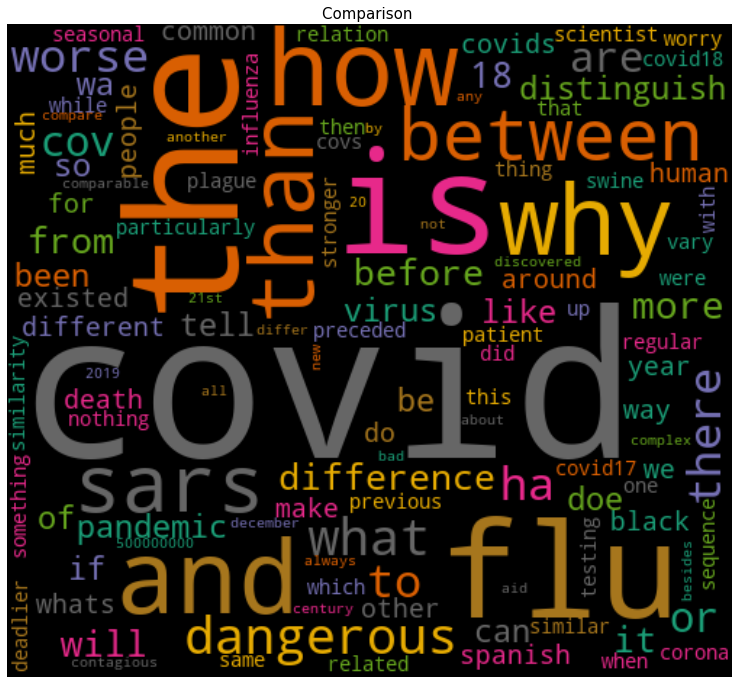

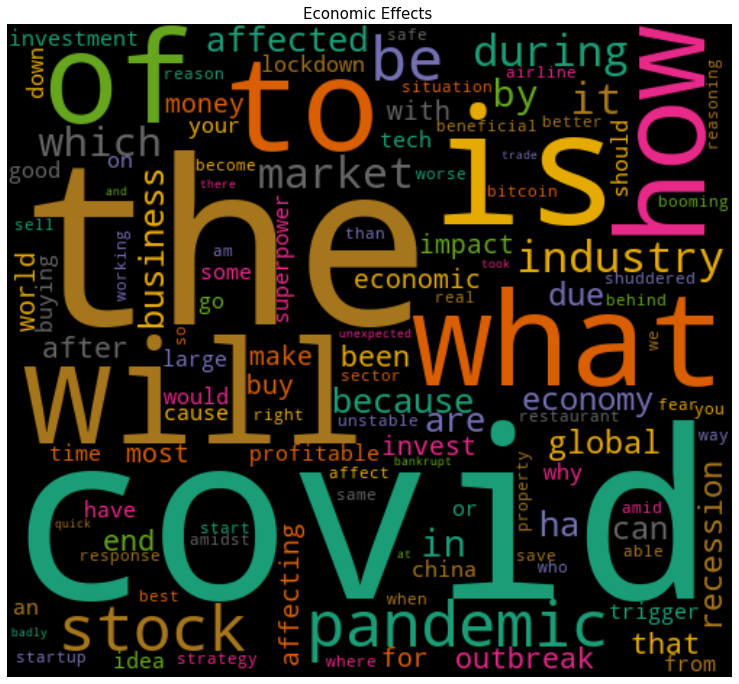

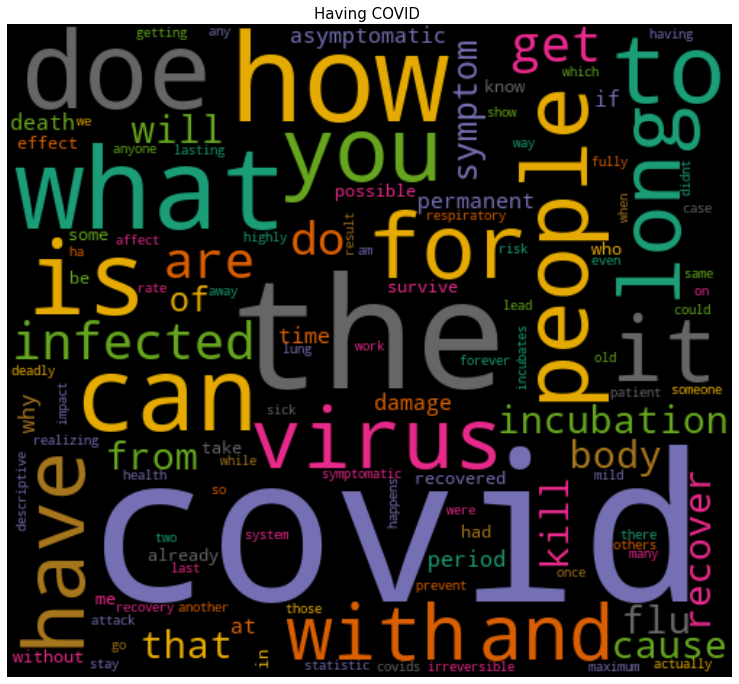

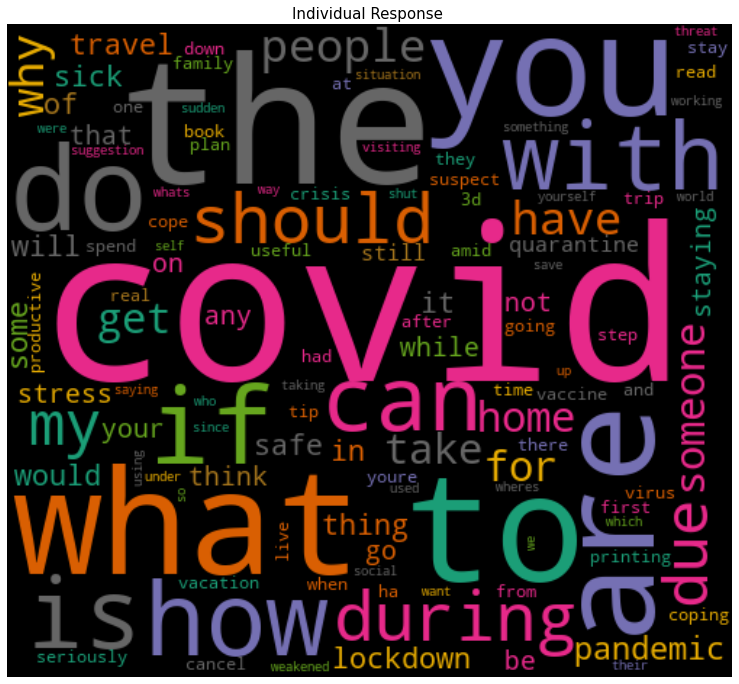

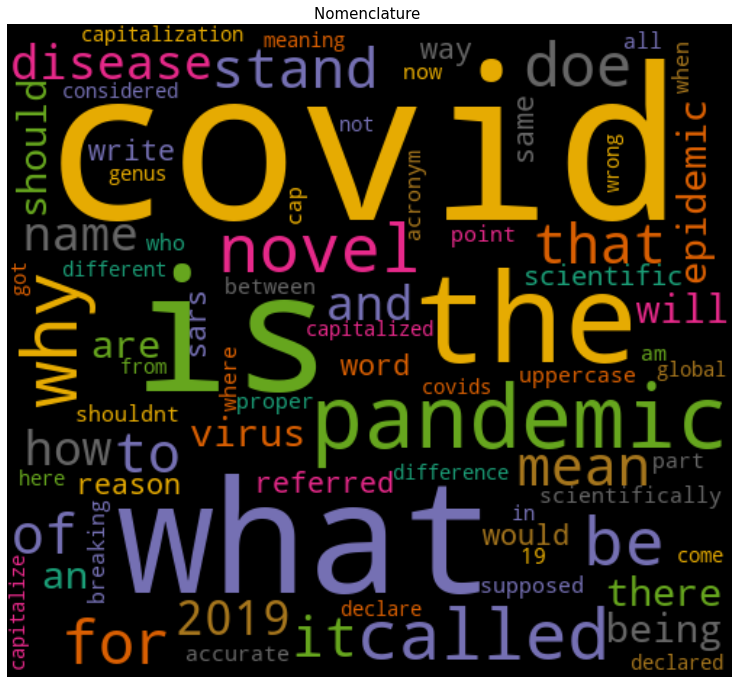

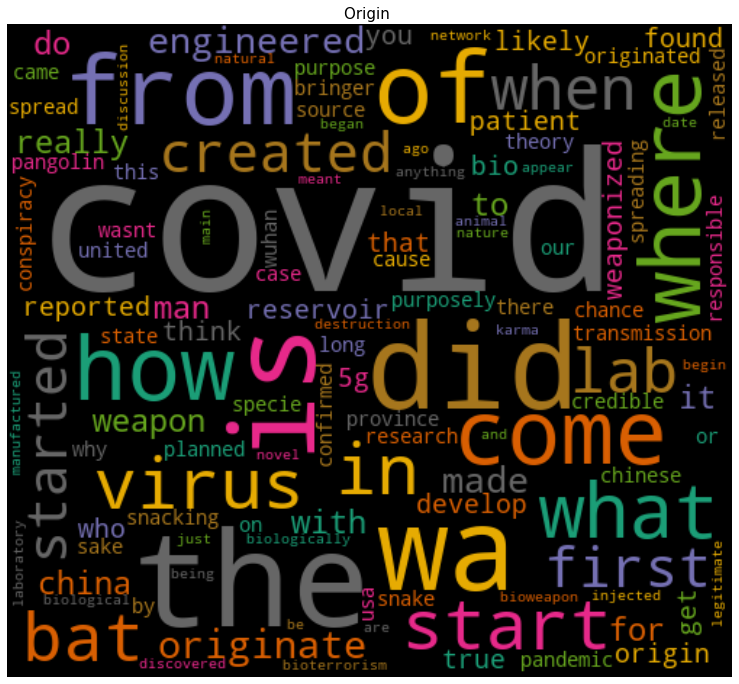

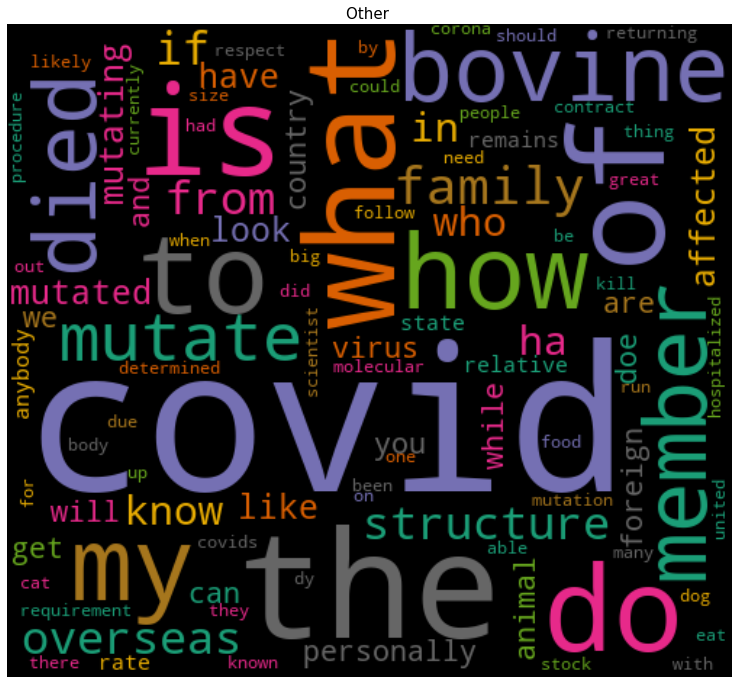

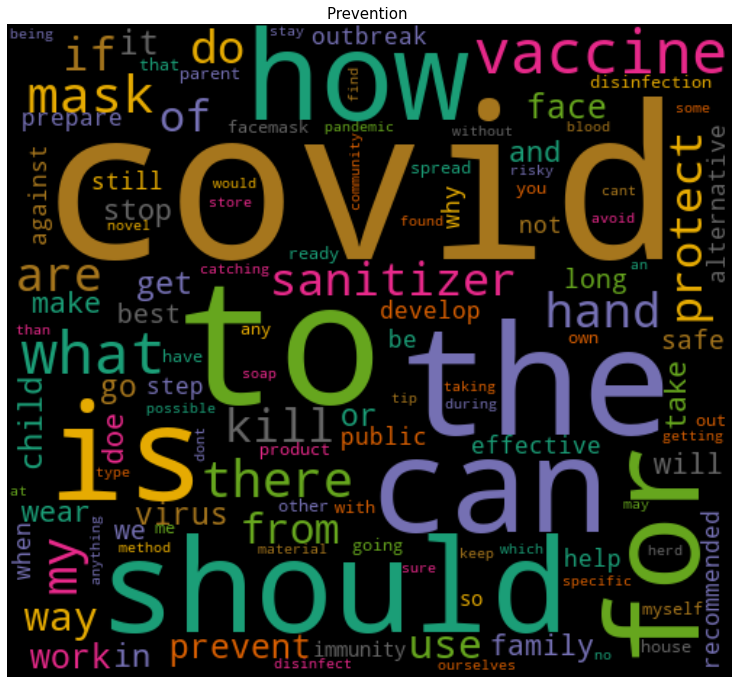

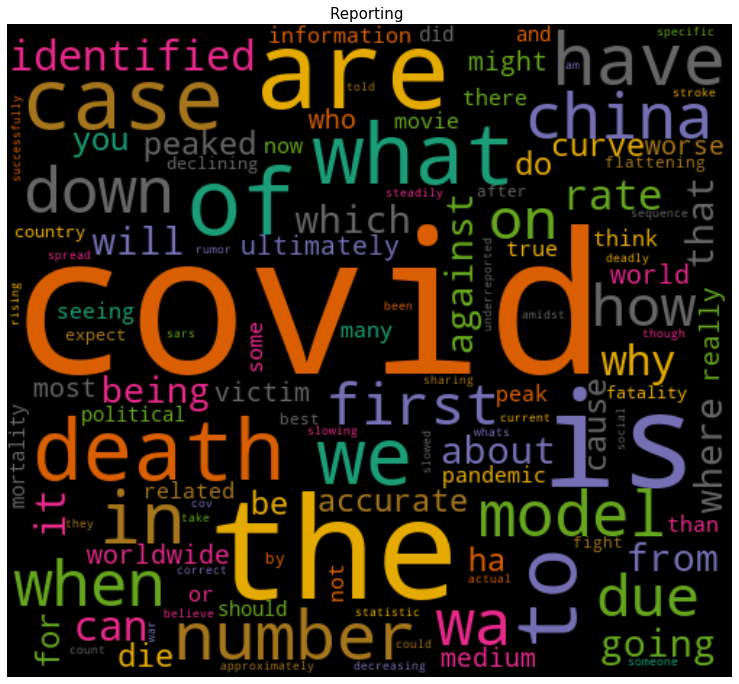

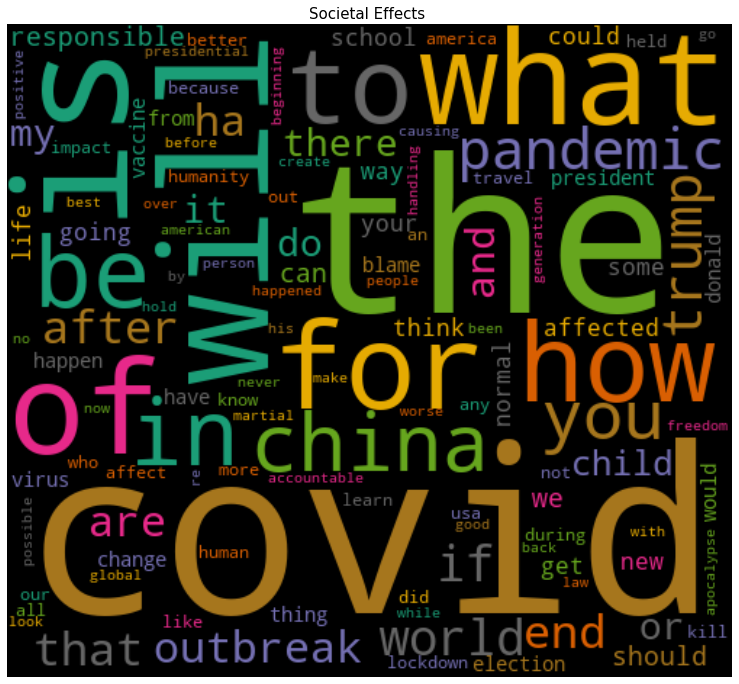

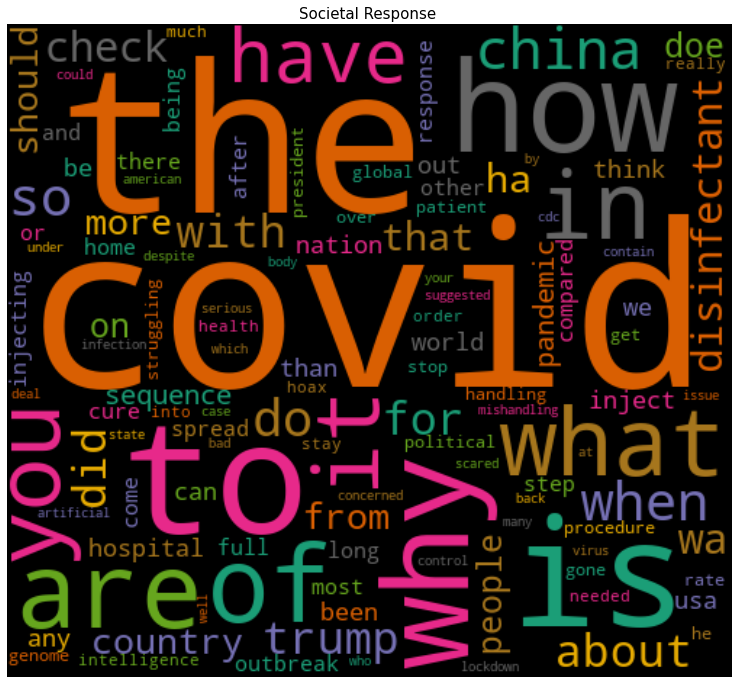

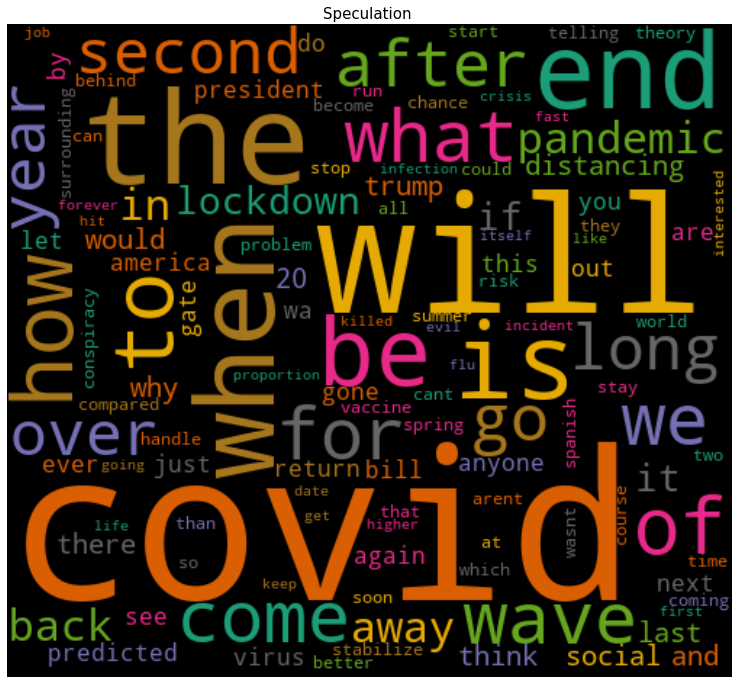

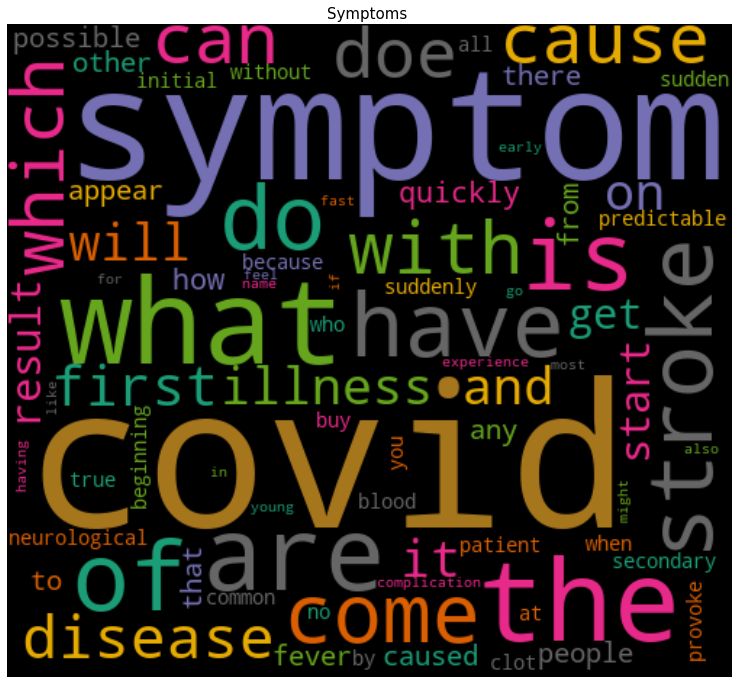

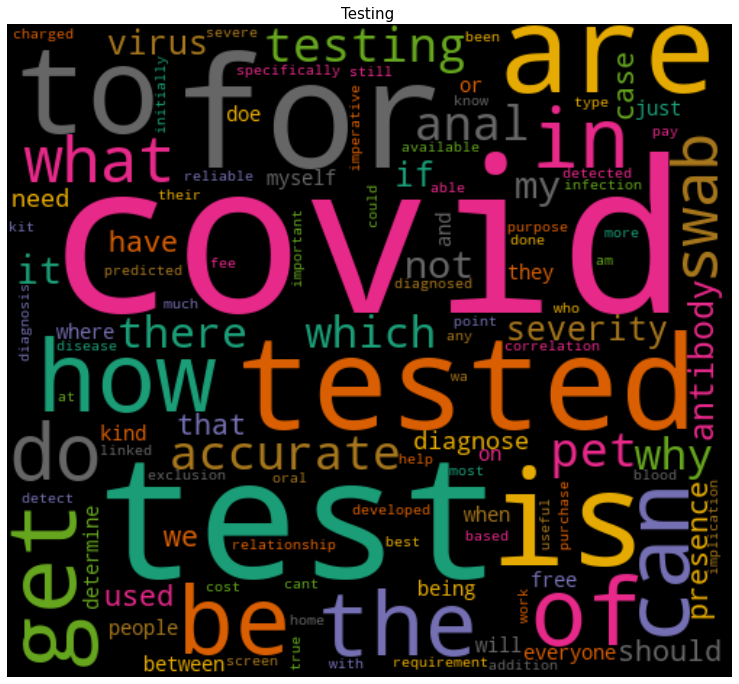

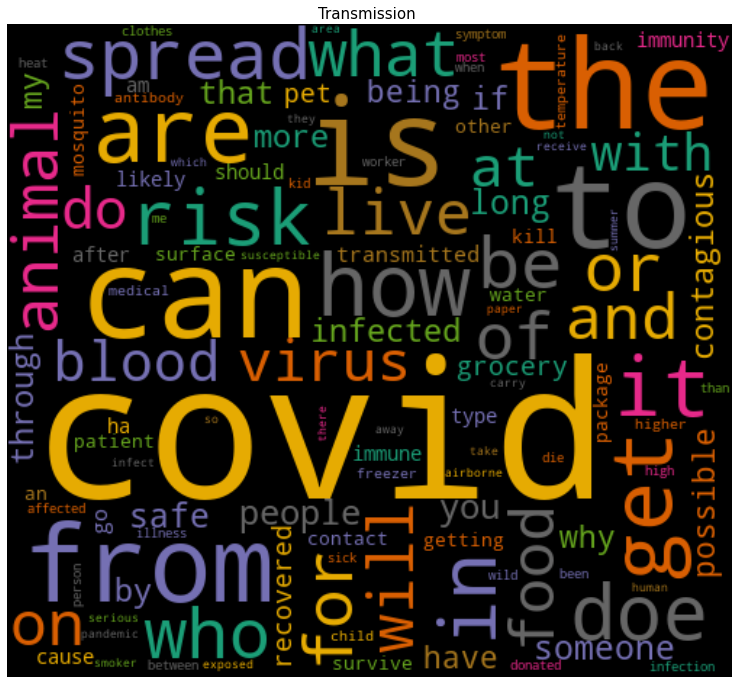

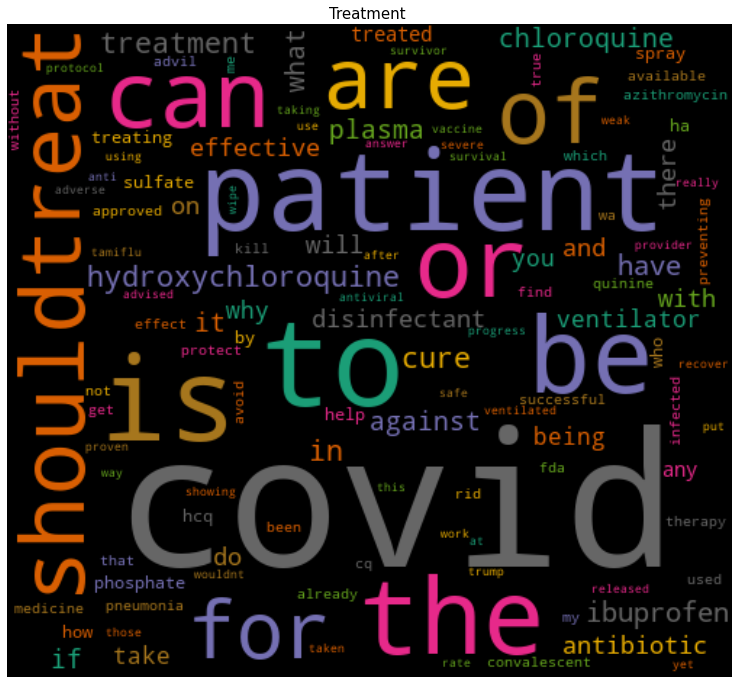

In [48]:
# Plotting word cloud for each category
for index,category in enumerate(df_dtm.columns):
#     print(df_dtm[df_dtm[product]!=0][product])
    generate_wordcloud(df_dtm[df_dtm[category]!=0][category].sort_values(ascending=False), category)



### divide train test data

In [49]:
# df

In [50]:
df_new = df[~df.Category.isna()]
# df_new

In [51]:
# create new category by taking initial words after splitting on "-"
df_new['Category_new'] = df['Category'].str.split('-')
# df_new

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
df_new['Category_new'] = df_new.Category_new.apply(lambda x: x[0])
# df_new

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
df_new = df_new[['Category_new', 'Question','Source']]
df_new

Category_new                                           Question  \
0     Speculation                                 will covid end soon   
1     Speculation                                      will covid end   
2     Speculation                             when covid will be over   
3     Speculation                            when covid lockdown ends   
4     Speculation                                  will covid go away   
...            ...                                                ...   
1240    Reporting   is the media hiding what is really going on in...   
1241    Treatment      can quinine be taken to fight this covid virus   
1242    Treatment            why is quinine effective in curing covid   
1243        Other                   could we run out of things to eat   
1244        Other                       do i need to stock up on food   

                Source  
0        Google Search  
1         Yahoo Search  
2        Google Search  
3        Google Search  
4        Google Search  
...                ...  
1240             Quora  
1241             Quora  
1242             Quora  
1243  Author Generated  
1244  Author Generated  

[1245 rows x 3 columns]

In [54]:
# all the author generated data is test data 
test_author = df_new[df_new['Source']=='Author Generated']
test_author = test_author.rename({'Category_new':'Category'}, axis=1)
test_author = test_author.drop(['Source'], axis=1)
test_author.to_csv("./data_generated/test_data_author_generated.csv", index=False)

In [55]:
test_author

Category                                           Question
133   Societal Response   why have so many people died from covid in the us
134   Societal Response             why does the us have so many infections
135   Societal Response   for what reasons is the us handling the pandem...
136   Societal Response              how come the us is hit so bad by covid
182    Societal Effects          is the world going to end because of covid
...                  ...                                                ...
1043         Prevention   what is taking so long to develop a vaccine fo...
1061         Prevention                   can i use radiation to kill covid
1079              Other                  what animals are affected by covid
1243              Other                   could we run out of things to eat
1244              Other                       do i need to stock up on food

[249 rows x 2 columns]

In [56]:
# dataframe for data accept source author generated
df_new1 = df_new[df_new['Source']!='Author Generated']
df_new1

Category_new                                           Question  \
0          Speculation                                 will covid end soon   
1          Speculation                                      will covid end   
2          Speculation                             when covid will be over   
3          Speculation                            when covid lockdown ends   
4          Speculation                                  will covid go away   
...                 ...                                                ...   
1238  Societal Effects   how will the covid pandemic change chinas rela...   
1239         Reporting               is covid worse than we are being told   
1240         Reporting   is the media hiding what is really going on in...   
1241         Treatment      can quinine be taken to fight this covid virus   
1242         Treatment            why is quinine effective in curing covid   

             Source  
0     Google Search  
1      Yahoo Search  
2     Google Search  
3     Google Search  
4     Google Search  
...             ...  
1238          Quora  
1239          Quora  
1240          Quora  
1241          Quora  
1242          Quora  

[996 rows x 3 columns]

In [57]:
# divide train test data by each category by percent
train_df = pd.DataFrame()
test_df= pd.DataFrame()
# group dataframe according to category, first x% questions into train and other into test data
for name, group in df_new1.groupby(['Category_new']):
#     print(name)
    data = group['Question'].unique()
#     print(len(data))
    random.shuffle(data)
    train_data = data[:int((len(data)+1)*test_percent/100)] #Remaining 80% to training set
    test_data = data[int((len(data)+1)*test_percent/100):] #Splits 20% data to test set
#     print(len(train_data))
#     print(len(test_data))
    df1 = pd.DataFrame({'Category':name, 'Question':train_data})
    df2 = pd.DataFrame({'Category':name, 'Question':test_data})
#     print(df1)
#     print(df2)
    train_df = train_df.append(df1)
    test_df = test_df.append(df2)

In [58]:
train_df

Category                                           Question
0   Comparison                       is covid worse then swine flu
1   Comparison   did covid exist years before scientists discov...
2   Comparison                  how are covid and sars cov similar
3   Comparison               is covid more contagious than the flu
4   Comparison                     is covid worse than spanish flu
..          ...                                                ...
10   Treatment                should covid patients take ibuprofen
11   Treatment   is any disinfectant injection available for covid
12   Treatment   has chloroquine been found to be effective aga...
13   Treatment                                  do covid have cure
14   Treatment   can disinfectant sprays or wipes be used on my...

[293 rows x 2 columns]

In [59]:
test_df

Category                                           Question
0   Comparison                   was there a covid 18 before covid
1   Comparison                             why is covid so fearful
2   Comparison                            why covid is not the flu
3   Comparison   how do i know if it is covid or just the commo...
4   Comparison   what happened to covid 1 18 and will there be ...
..          ...                                                ...
31   Treatment   are antibiotics effective in preventing or tre...
32   Treatment                    should covid patients take advil
33   Treatment            do covid patients on ventilators recover
34   Treatment   if a covid patient progresses to pneumonia wha...
35   Treatment            why is quinine effective in curing covid

[691 rows x 2 columns]

In [60]:
# get the counts of questions per category for train data
train_df.Category.value_counts()

Transmission            56
Societal Effects        30
Prevention              24
Societal Response       24
Origin                  20
Reporting               20
Economic Effects        15
Speculation             15
Treatment               15
Individual Response     14
Comparison              13
Testing                 12
Having COVID            11
Nomenclature            11
Symptoms                 7
Other                    6
Name: Category, dtype: int64

In [61]:
# get the counts of questions per category for test data
test_df.Category.value_counts()

Transmission            132
Societal Effects         70
Prevention               57
Societal Response        55
Reporting                48
Origin                   47
Treatment                36
Speculation              35
Economic Effects         34
Individual Response      33
Comparison               32
Testing                  30
Having COVID             25
Nomenclature             25
Symptoms                 18
Other                    14
Name: Category, dtype: int64

In [62]:
# test_author = pd.read_csv("./data_generated/test_data_author_generated.csv")
test_author.Category.value_counts()

Transmission            42
Prevention              40
Treatment               20
Testing                 19
Societal Response       16
Comparison              15
Societal Effects        14
Having COVID            12
Symptoms                12
Nomenclature            11
Reporting               11
Other                   11
Individual Response     10
Origin                   7
Economic Effects         6
Speculation              3
Name: Category, dtype: int64

In [63]:
# save train and test data
train_df.to_csv("./data_generated/train_data.csv", index=False)
test_df.to_csv("./data_generated/test_data.csv", index=False)

In [64]:
# train and test data stastics
print("train data shape : ", train_df.shape)
print("test data shape : ", test_df.shape)
print("author test data shape : ", test_author.shape)

train data shape :  (293, 2)
test data shape :  (691, 2)
author test data shape :  (249, 2)
